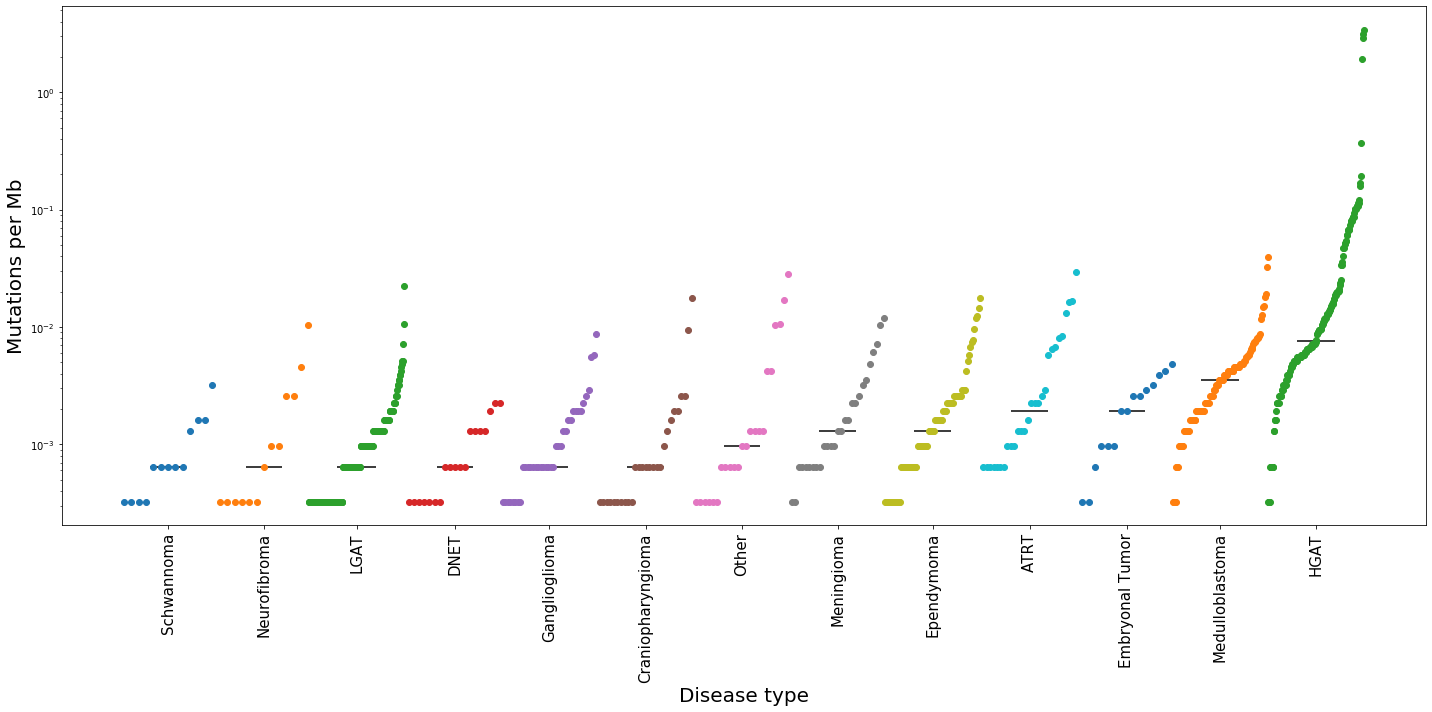

In [28]:
### This script takes the TMB scores as input and 
#    generates a disease based cumulative function dist plot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

#tmb_scores = "/Users/kogantit/Documents/git_repos/d3b-bix-analysis-toolkit/analyses/TMBanalysis/output/pbta-snv-mutect2-tmbscores.target.txt"
tmb_scores = "/Users/kogantit/Documents/git_repos/d3b-bix-analysis-toolkit/analyses/TMBanalysis/output/pbta-snv-consensus-mutation_tmb.txt"
tmbfile = pd.read_csv(tmb_scores, sep="\t")


# Choosing disease list to plot
disease_number = tmbfile.groupby("disease").count()['TMB']
top_diseases = disease_number[disease_number>10].index
sorted_diseases = tmbfile.groupby("disease").median().sort_values('TMB')



sorted_diseases_final = []
for dis in sorted_diseases.index:
    if dis in top_diseases:
        sorted_diseases_final.append(dis)
               

        
# Creating TMB cumulative dist plot        
perdisease = tmbfile.groupby("disease")
plt.figure(figsize=(20,10))
tick_locs = []
for i, disease in enumerate(sorted_diseases_final): # i is index number, disease is disaese name
    disease_df = perdisease.get_group(disease) # Getting disease DF
    TMB = disease_df["TMB"].sort_values() #TMB will ne used for y-axis 
    x = (np.arange(1, len(TMB)+1)/len(TMB))+i #this generate an array in every loop that clusters
                                              # all disease x-axis together and adds so the next disease 
                                              # x-axis numbers are spaced separaetly from previous disease
    #print(np.median(x))                      
    tick_locs.append(np.median(x))            # Takes the median of x-axis array and prints disease name there
    #print((i+max(x))/2)
    plt.plot(x,TMB, linestyle="none", marker="o")
    plt.hlines(np.median(TMB), np.percentile(x,30),np.percentile(x,70))
                                              # Takes y-axis median to know where to print median line
                                              # 30 and 70 show how long the median line should go on x-axis
    plt.yscale("log")
plt.xticks(tick_locs, rotation=90, fontsize=15)
ax=plt.gca()
ax.set_xticklabels(sorted_diseases_final)
ax.set_ylabel('Mutations per Mb', fontsize = 20)        
ax.set_xlabel('Disease type',fontsize = 20) 

plt.tight_layout()
#plt.savefig("/Users/kogantit/Documents/git_repos/d3b-bix-analysis-toolkit/analyses/TMBanalysis/output/pbta-snv-mutect2.CFD.TMB.png")




In [30]:
(tmbfile[tmbfile["disease"]=="LGAT"]).sort_values("TMB").to_csv("temp.txt", sep="\t", index=None)